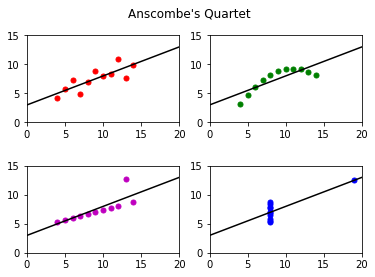

In [40]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from scipy import special
import math

def problem_1():
    data = np.load("/Users/rubyzhang/Desktop/UChicago/OSML/BootCamp2017/Computation/Wk2_VisPandas/anscombe.npy")
    x = np.linspace(0,20,100)
    y = 1/2*x+3

    fig, axes = plt.subplots(nrows=2, ncols=5)
    plt.subplot(221)
    plt.plot(data[:,0],data[:,1],'ro',markersize=5)
    plt.plot(x,y,'k-')
    plt.axis([0, 20, 0, 15])

    plt.subplot(222)
    plt.plot(data[:,2],data[:,3],'go',markersize=5)
    plt.plot(x,y,'k-')
    plt.axis([0, 20, 0, 15])

    plt.subplot(223)
    plt.plot(data[:,4],data[:,5],'mo',markersize=5)
    plt.plot(x,y,'k-')
    plt.axis([0, 20, 0, 15])

    plt.subplot(224)
    plt.plot(data[:,6],data[:,7],'bo',markersize=5)
    plt.plot(x,y,'k-')
    plt.axis([0, 20, 0, 15])

    fig.subplots_adjust(hspace=.5)
    plt.suptitle('Anscombe\'s Quartet')
    plt.show()

problem_1()

Descriptions of Anscombe's Quartet: 

I: This section is scattered randomly around the regression line

II: This section is a smooth concave curve

III: This section is a straight line with a similar slope to the regression except for one outlier

IV: This section is a vertical line at x=8 except for one far outlier

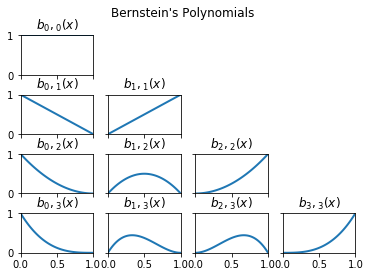

In [12]:
def problem_2(n):
    x = np.linspace(0,1,100)
    fig, axes = plt.subplots(nrows=n, ncols=n)
    for i in range(n):
        for j in range(n):
            plt_num = i*n+j+1
            plt.subplot(n,n,plt_num)
            if j <= i:
                y = special.binom(i,j)*(x**j)*(1-x)**(i-j)
                plt.plot(x,y,lw=2)
                plt.title(r'$b_{},_{}(x)$'.format(j,i))
            else:
                plt.axis('off')
            plt.axis([0, 1, 0, 1])
            plt.tick_params(which='both', top='off', right='off')
            if plt_num <= 12:
                plt.tick_params(labelbottom='off')
            if plt_num % n != 1:
                plt.tick_params(labelleft='off')
    fig.subplots_adjust(hspace=.5)
    plt.suptitle('Bernstein\'s Polynomials')
    plt.show()

problem_2(4)

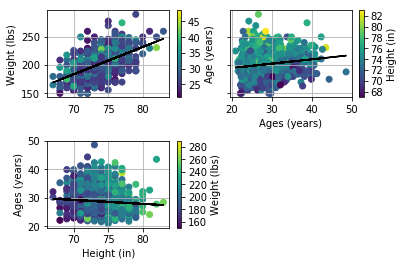

In [13]:
def problem_3():
    data = np.load("/Users/rubyzhang/Desktop/UChicago/OSML/BootCamp2017/Computation/Wk2_VisPandas/MLB.npy")
    height = data[:,0]
    weight = data[:,1]
    age = data[:,2]
    fig, axes = plt.subplots(nrows=2, ncols=2)
    
    fit_1 = np.polyfit(height,weight,1)
    fit_1n = np.poly1d(fit_1)
    plt.subplot(221)
    plt.scatter(height,weight,c=age)
    cbar = plt.colorbar()
    cbar.set_label("Age (years)")
    plt.plot(height,fit_1n(height),'k-')
    plt.grid()
    plt.ylabel("Weight (lbs)")
    plt.tick_params(bottom='off')
    
    fit_2 = np.polyfit(age,weight,1)
    fit_2n = np.poly1d(fit_2)
    plt.subplot(222)
    plt.scatter(age,weight,c=height)
    cbar = plt.colorbar()
    cbar.set_label("Height (in)")
    plt.plot(age,fit_2n(age),'k-')
    plt.grid()
    plt.xlabel("Ages (years)")
    plt.tick_params(labelleft='off')
    
    fit_3 = np.polyfit(height,age,1)
    fit_3n = np.poly1d(fit_3)
    plt.subplot(223)
    plt.scatter(height,age,c=weight)
    cbar = plt.colorbar()
    cbar.set_label("Weight (lbs)")
    plt.plot(height,fit_3n(height),'k-')
    plt.grid()
    plt.ylabel("Ages (years)")
    plt.xlabel("Height (in)")
    
    plt.subplot(224)
    plt.axis('off')
    
    fig.subplots_adjust(hspace=.5)
    plt.show()

problem_3()

As seen from the graphs above, weight and height seem to be much more correlated. There is relatively little correlation between age and weight, and age and height.

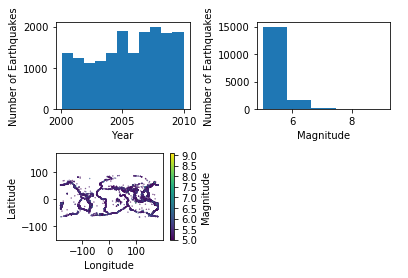

In [32]:
def problem_4():
    year, magnitude, longitude, latitude = np.load("/Users/rubyzhang/Desktop/UChicago/OSML/BootCamp2017/Computation/Wk2_VisPandas/earthquakes.npy").T
    
    fig, axes = plt.subplots(nrows=2, ncols=2)
    plt.subplot(221, adjustable='box-forced')
    plt.hist(year, bins=11, lw=0, histtype="stepfilled")
    plt.tick_params(top='off',right='off')
    plt.xlabel('Year')
    plt.ylabel('Number of Earthquakes')
    
    plt.subplot(222, adjustable='box-forced')
    plt.hist(magnitude, bins=5, lw=0, histtype="stepfilled")
    plt.tick_params(top='off',right='off')
    plt.xlabel('Magnitude')
    plt.ylabel('Number of Earthquakes')
    
    plt.subplot(223, adjustable='box-forced')
    plt.scatter(longitude,latitude,c=magnitude,s=0.1)
    cbar = plt.colorbar()
    cbar.set_label("Magnitude")
    plt.axis('equal')
    plt.tick_params(top='off',right='off')
    plt.ylabel('Latitude')
    plt.xlabel('Longitude')
    
    plt.subplot(224)
    plt.axis('off')
    
    fig.subplots_adjust(wspace=.5, hspace=.5)
    plt.show()
    
problem_4()

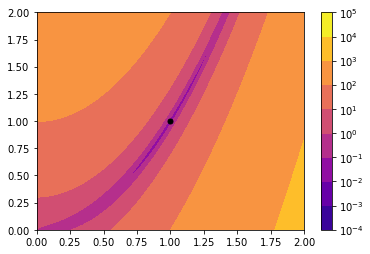

In [53]:
def problem_5():
    x = np.linspace(0,2,200)
    X, Y = np.meshgrid(x,x.copy())
    Z = (1-X)**2 + 100*(Y-X**2)**2
    
    plt.contourf(X,Y,Z,20,cmap='plasma',norm=LogNorm())
    plt.plot([1],[1],'ko',markersize=5)
    plt.colorbar()
    plt.tick_params(top='off',right='off')
    
    plt.show()
    
problem_5()

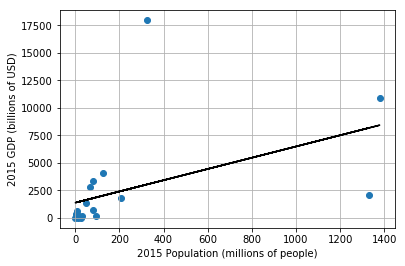

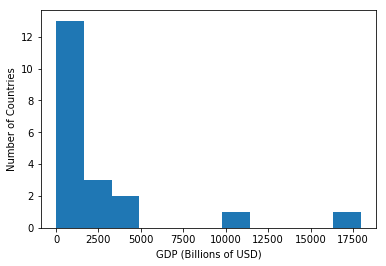

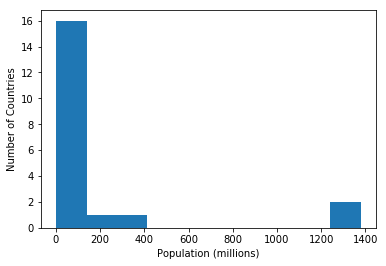

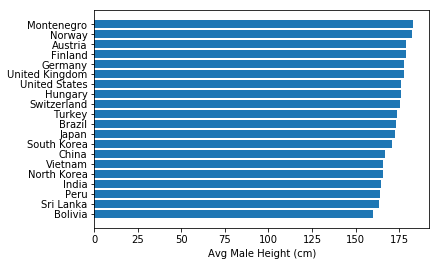

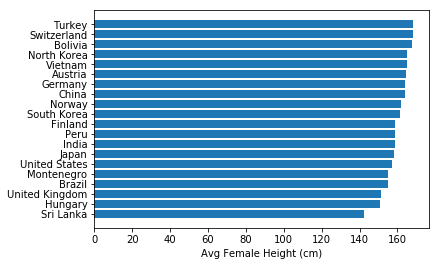

In [59]:
def problem_6():
    population, GDP, male_height, fem_height = np.load("/Users/rubyzhang/Desktop/UChicago/OSML/BootCamp2017/Computation/Wk2_VisPandas/countries.npy").T
    countries = np.array(["Austria", "Bolivia", "Brazil", "China",
                         "Finland", "Germany", "Hungary", "India",
                         "Japan", "North Korea", "Montenegro", "Norway",
                         "Peru", "South Korea", "Sri Lanka", "Switzerland",
                         "Turkey", "United Kingdom", "United States", "Vietnam"])

    plt.scatter(population, GDP)
    fit = np.polyfit(population,GDP,1)
    fit_n = np.poly1d(fit)
    plt.plot(population,fit_n(population),'k-')
    plt.grid()
    plt.tick_params(top='off',right='off')
    plt.ylabel("2015 GDP (billions of USD)")
    plt.xlabel("2015 Population (millions of people)")
    plt.show()
    
    plt.hist(GDP, bins=11, lw=0, histtype="stepfilled")
    plt.tick_params(top='off',right='off')
    plt.xlabel('GDP (Billions of USD)')
    plt.ylabel('Number of Countries')
    plt.show()
    
    plt.hist(population, bins=10, lw=0, histtype="stepfilled")
    plt.tick_params(top='off',right='off')
    plt.xlabel('Population (millions)')
    plt.ylabel('Number of Countries')
    plt.show()
    
    positions = np.arange(len(countries))

    index = np.argsort(male_height)
    male_height = male_height[index]
    countries = countries[index]
    plt.barh(positions,male_height, align='center')
    plt.yticks(positions, countries)
    plt.xlabel('Avg Male Height (cm)')
    plt.show()
    
    index2 = np.argsort(fem_height)
    fem_height = fem_height[index2]
    countries = countries[index2]
    plt.barh(positions,fem_height, align='center')
    plt.yticks(positions, countries)
    plt.xlabel('Avg Female Height (cm)')
    plt.show()
    
problem_6()

From the data visualization, it can be seen that there seems to be a slight correlation between population and GDP, though there are three stark outliers (USA, China, and India). In addition, the majority of countries have a GDP and population below $2500 billion and 200 million, respectively. Finally, it seems that the average height of men and women range from 160 to 175 and 140 to 160, respectively.